In [26]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

In [27]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 208, 208, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [28]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

#DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "weights.h5")
DEFAULT_WEIGHT_FILE = os.path.join("aadebugert1/", "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in aadebugert1/weights.h5


fname /Volumes/G-DRIVE/github2019/Yolo-digit-detector/images/imgtest2.png


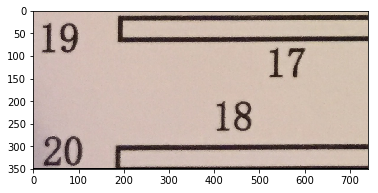

fname /Volumes/G-DRIVE/github2019/Yolo-digit-detector/images/img03.png


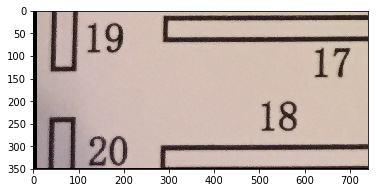

In [29]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
#DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "images")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "imgtest2.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "img03.png")]
imgs = []
for fname in img_files:
    print("fname",fname)
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

0-boxes are detected.


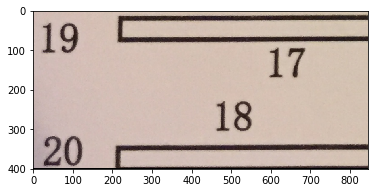

0-boxes are detected.


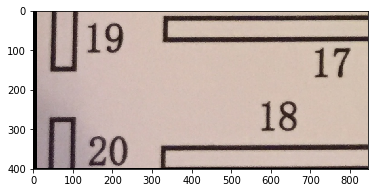

In [30]:
# 4. Predict digit region

THRESHOLD = 0.3
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()
